In [85]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv("Lung.csv")

# Separating features and labels
X = df.iloc[:, :-1].values  
y = df.iloc[:, -1].values 

In [5]:
# Standardizing the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [7]:
# Split data before applying PCA
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

In [ ]:
# Part 1.1: PCA from Scratch

In [9]:
#Function to centre the data
def center_data(X):
    mean = np.mean(X, axis=0)
    return X - mean

In [29]:
def pca_from_scratch(X, n_components):
    # Step 1: Center the data
    X_centered = center_data(X)
    
    # Step 2: Compute the covariance matrix
    cov_matrix = np.cov(X_centered, rowvar=False)
    
    # Step 3: Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    
    # Step 4: Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # Step 5: Select the top n_components
    eigenvectors = eigenvectors[:, :n_components]
    
    # Step 6: Transform the data
    X_reduced = np.dot(X_centered, eigenvectors)
    return X_reduced, eigenvalues, eigenvectors
    
n_components = 2  # Example: Retain 2 components for visualization
X_reduced, eigenvalues, eigenvectors = pca_from_scratch(X_train, n_components)

In [33]:
# Explained variance
explained_variance = eigenvalues / np.sum(eigenvalues)
print("Explained Variance (From Scratch):", explained_variance)

Explained Variance (From Scratch): [ 5.32405665e-02-1.39361776e-35j  3.96951363e-02-1.03905444e-35j
  3.07856483e-02-8.05840901e-36j ... -1.85542336e-17+4.85673069e-51j
 -2.17373705e-17+5.68994426e-51j -2.57373133e-17+6.73696378e-51j]


In [35]:
# PCA using scikit-learn
pca = PCA(n_components=0.95)  
X_reduced_sklearn = pca.fit_transform(X_train)
# Compare explained variance
print("Explained Variance (Scikit-learn):", pca.explained_variance_ratio_)

Explained Variance (Scikit-learn): [0.05324057 0.03969514 0.03078565 0.02705034 0.01487829 0.01382133
 0.01312027 0.0116443  0.01021958 0.00928334 0.00826673 0.00814453
 0.00779219 0.00744546 0.00723372 0.00708673 0.00682593 0.00648372
 0.00629773 0.00608419 0.00580304 0.00564624 0.00554936 0.00549242
 0.00537636 0.00529635 0.00518888 0.00511096 0.00503282 0.00494208
 0.00490471 0.00477472 0.00469735 0.00465669 0.00458032 0.00444014
 0.00438972 0.00432473 0.00416682 0.00413975 0.00404776 0.00400353
 0.00397837 0.00387359 0.0038221  0.00378238 0.00368231 0.00364918
 0.00360189 0.00355639 0.00351156 0.00346785 0.00345051 0.00341993
 0.00339724 0.0032962  0.00328916 0.00323954 0.00318261 0.00315905
 0.00314105 0.00307281 0.00306538 0.00303536 0.00303266 0.0030077
 0.0029797  0.00293231 0.00290308 0.00287362 0.00285351 0.00281731
 0.00279491 0.00278801 0.00276769 0.00272691 0.0027251  0.00270729
 0.00268414 0.00266233 0.00265164 0.00261316 0.00258879 0.00257182
 0.00256633 0.00254423 0.002

In [37]:
# Kernel PCA functions
def rbf_kernel(X, gamma=1.0):
    pairwise_dists = squareform(pdist(X, 'sqeuclidean'))
    return np.exp(-gamma * pairwise_dists)


In [39]:
def polynomial_kernel(X, degree=2):
    return (np.dot(X, X.T) + 1) ** degree


In [41]:
def linear_kernel(X):
    return np.dot(X, X.T)

In [45]:
def center_kernel_matrix(K):
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K_centered = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    return K_centered

In [47]:
def kpca(X, kernel, n_components):
    # Step 1: Compute the kernel matrix
    K = kernel(X)
    
    # Step 2: Center the kernel matrix
    K_centered = center_kernel_matrix(K)
    
    # Step 3: Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = eigh(K_centered)
    
    # Step 4: Sort eigenvalues and eigenvectors
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # Step 5: Select the top n_components
    eigenvectors = eigenvectors[:, :n_components]
    
    # Step 6: Transform the data
    X_reduced = np.dot(K_centered, eigenvectors)
    
    return X_reduced, eigenvalues

In [53]:
# Apply KPCA with RBF kernel
X_reduced_kpca_rbf, _ = kpca(X_train, rbf_kernel, n_components=2)

In [63]:
# Apply KPCA with Polynomial kernel
X_reduced_kpca_poly, _ = kpca(X_train, polynomial_kernel, n_components=2)

In [57]:
# Apply KPCA with Linear kernel
X_reduced_kpca_linear, _ = kpca(X_train, linear_kernel, n_components=2)

In [59]:
# Combine kernels
def combined_kernel(X, kernel1, kernel2, alpha=0.5):
    return alpha * kernel1(X) + (1 - alpha) * kernel2(X)


In [65]:
# Covariance matrix analysis
cov_matrix = np.cov(X_train, rowvar=False)
top_10_features = np.argsort(np.diag(cov_matrix))[::-1][:10]
X_train_top10 = X_train[:, top_10_features]
X_test_top10 = X_test[:, top_10_features]

In [77]:
# Classification experiment
def evaluate_classifier(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted", zero_division=0)
    recall = recall_score(y_test, y_pred, average="weighted", zero_division=0)
    return accuracy, precision, recall


In [79]:
# Test classifiers
classifiers = {
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "LDA": LinearDiscriminantAnalysis()
}

In [81]:
results = {}
for name, clf in classifiers.items():
    accuracy, precision, recall = evaluate_classifier(clf, X_train_top10, X_test_top10, y_train, y_test)
    results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall}

In [83]:
# Print results
for name, metrics in results.items():
    print(f"{name}: Accuracy = {metrics['Accuracy']}, Precision = {metrics['Precision']}, Recall = {metrics['Recall']}")

Naive Bayes: Accuracy = 0.0273972602739726, Precision = 0.0007506098705197973, Recall = 0.0273972602739726
KNN: Accuracy = 0.5159817351598174, Precision = 0.2662371510185359, Recall = 0.5159817351598174
LDA: Accuracy = 0.5159817351598174, Precision = 0.2662371510185359, Recall = 0.5159817351598174


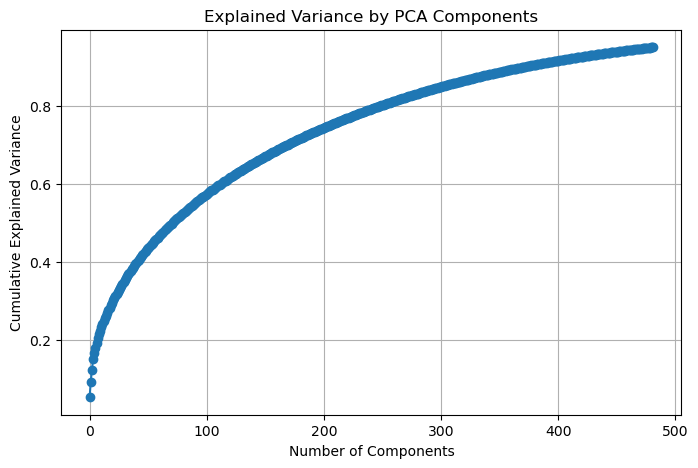

In [87]:
# 1. Explained Variance Plot (for PCA)
def plot_explained_variance(pca):
    plt.figure(figsize=(8, 5))
    plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
    plt.xlabel("Number of Components")
    plt.ylabel("Cumulative Explained Variance")
    plt.title("Explained Variance by PCA Components")
    plt.grid()
    plt.show()

# Plot explained variance for PCA
pca = PCA(n_components=0.95)
X_reduced_sklearn = pca.fit_transform(X_train)
plot_explained_variance(pca)

C:\Anaconda\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Anaconda\Lib\site-packages\matplotlib\collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


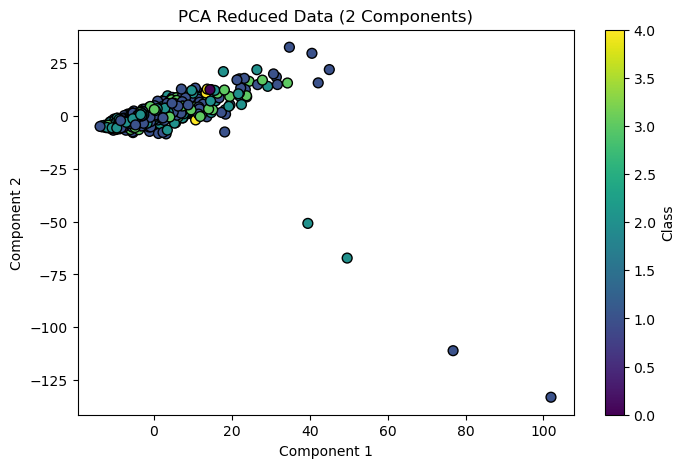

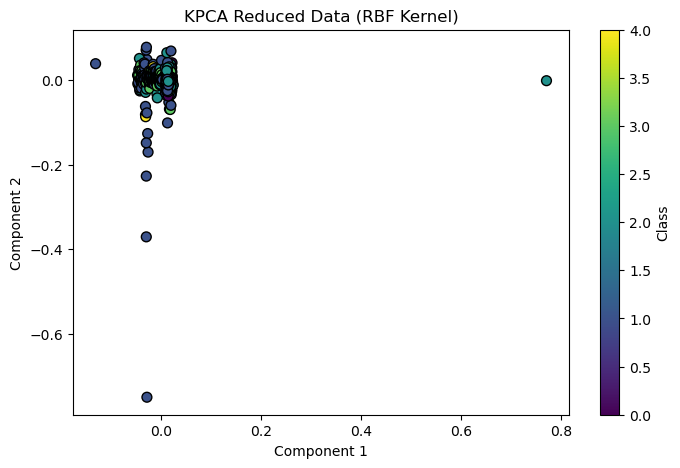

In [89]:
# 2. Scatter Plots of Reduced Data (for PCA and KPCA)
def plot_reduced_data(X_reduced, y, title):
    plt.figure(figsize=(8, 5))
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="viridis", edgecolor="k", s=50)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.title(title)
    plt.colorbar(label="Class")
    plt.show()

# Plot PCA-reduced data
X_reduced_pca, _, _ = pca_from_scratch(X_train, n_components=2)
plot_reduced_data(X_reduced_pca, y_train, "PCA Reduced Data (2 Components)")

# Plot KPCA-reduced data (RBF Kernel)
X_reduced_kpca_rbf, _ = kpca(X_train, rbf_kernel, n_components=2)
plot_reduced_data(X_reduced_kpca_rbf, y_train, "KPCA Reduced Data (RBF Kernel)")